# Crptocurrency Web Scrapper with Analysis

This project utilizes Python to scrape and extract data on the top 10 cryptocurrencies from CoinMarketCap on a weekly basis, enabling analysis of trends and patterns in cryptocurrency performance and the development of predictive models for fututre market trends.

# Contents

# 1. Extraction

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# 1.1 Initializing Crypto Data Lists and Creating DataFrame

In [2]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_price_list = []
crypto_market_cap_list = []
crypto_pct_24h_list =[]
crypto_pct_7d_list =[]
crypto_pct_1h_list =[]
crypto_volume_24h_list =[]
crypto_circulating_supply_list =[]

df = pd.DataFrame()


# 1.2 Function: Scrape date list from CoinMarketCap

In [3]:
scrape_data_list = []
scrape_date_list = scrape_data_list

def scrape_data():
  url = 'https://coinmarketcap.com/historical/'
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser' )

  a_tags = soup.find_all('a', class_ = 'historical-link cmc-link')
  for tag in a_tags:
    href = tag.get('href')
    scrape_date_list.append(href)

scrape_data()
print('There are ' + str(len(scrape_date_list)) + ' days(Sundays) available for scraping from the CoinMarketCap historical data')


There are 597 days(Sundays) available for scraping from the CoinMarketCap historical data


# 1.3 Function: Scrape Cryptocurrency Data for Specific Date

In [4]:
def scrape_crypto_data(date):
  url = 'https://coinmarketcap.com' + date
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
  count = 0
  for row in tr:
      if count == 10:
        break
      count += 1

      try:
        crypto_date = date
      except AttributeError:
        crypto_date = None

      try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
      except AttributeError:
            crypto_name = None

      try:
          crypto_symbol = row.find('td', attrs= {'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
      except AttributeError:
          crypto_symbol = None

      try:
          crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
      except AttributeError:
          crypto_market_cap = None

      try:
          crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
      except AttributeError:
          crypto_price = None

      try:
          crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
      except AttributeError:
          crypto_circulating_supply = None

      try:
          crypto_voulume_24hr_td = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'})
          crypto_volume_24h = crypto_voulume_24hr_td.find('a', attrs={'class': 'cmc-link'}).text.strip()
      except AttributeError:
          crypto_volume_24h = None

      try:
          crypto_pct_1h = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
      except AttributeError:
          crypto_pct_1h = None

      try:
          crypto_pct_24h = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
      except AttributeError:
          crypto_pct_24h = None

      try:
          crypto_pct_7d = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
      except AttributeError:
          crypto_pct_7d = None



      crypto_date_list.append(crypto_date)
      crypto_name_list.append(crypto_name)
      crypto_symbol_list.append(crypto_symbol)
      crypto_market_cap_list.append(crypto_market_cap)
      crypto_pct_24h_list.append(crypto_pct_24h)
      crypto_pct_7d_list.append(crypto_pct_7d)
      crypto_price_list.append(crypto_price)
      crypto_pct_1h_list.append(crypto_pct_1h)
      crypto_volume_24h_list.append(crypto_volume_24h)
      crypto_circulating_supply_list.append(crypto_circulating_supply)


# 1.4 Scraping Cryptocurrency Data for Multiple Dates

In [5]:
from datetime import datetime

date_format = "%Y%m%d"

#   split and convert the start date and end date
start_date = datetime.strptime(scrape_date_list[0].split('/')[-2], date_format).strftime('%Y-%m-%d')
end_date = datetime.strptime(scrape_date_list[-1].split('/')[-2], date_format).strftime('%Y-%m-%d')
print('There are ' + str(len(scrape_date_list)) + 'days(Sundays) between ' + start_date + ' and ' + end_date + '.')

for i in range(len(scrape_date_list)):
  scrape_crypto_data(scrape_date_list[i])
  print('Completed' + str(i+1) + 'out of ' + str(len(scrape_date_list)))



There are 597days(Sundays) between 2013-04-28 and 2024-09-29.
Completed1out of 597
Completed2out of 597
Completed3out of 597
Completed4out of 597
Completed5out of 597
Completed6out of 597
Completed7out of 597
Completed8out of 597
Completed9out of 597
Completed10out of 597
Completed11out of 597
Completed12out of 597
Completed13out of 597
Completed14out of 597
Completed15out of 597
Completed16out of 597
Completed17out of 597
Completed18out of 597
Completed19out of 597
Completed20out of 597
Completed21out of 597
Completed22out of 597
Completed23out of 597
Completed24out of 597
Completed25out of 597
Completed26out of 597
Completed27out of 597
Completed28out of 597
Completed29out of 597
Completed30out of 597
Completed31out of 597
Completed32out of 597
Completed33out of 597
Completed34out of 597
Completed35out of 597
Completed36out of 597
Completed37out of 597
Completed38out of 597
Completed39out of 597
Completed40out of 597
Completed41out of 597
Completed42out of 597
Completed43out of 597
C

In [6]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_volume_24h_list
df['% 1h'] = crypto_pct_1h_list
df['% 24h'] = crypto_pct_24h_list
df['% 7d'] = crypto_pct_7d_list

df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,/historical/20130428/,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",None,0.64%,--,--
1,/historical/20130428/,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",None,0.80%,--,--
2,/historical/20130428/,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",None,-0.93%,--,--
3,/historical/20130428/,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",None,-0.05%,--,--
4,/historical/20130428/,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",None,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5962,/historical/20240929/,XRP,XRP,"$36,311,110,119.06",$0.6419,"56,564,039,920","$2,225,645,563.02",0.17%,4.42%,9.25%
5963,/historical/20240929/,USDC,USDC,"$36,237,021,600.75",$0.9999,"36,240,678,737","$3,054,087,539.82",-0.02%,-0.01%,-0.01%
5964,/historical/20240929/,Dogecoin,DOGE,"$18,222,871,869.60",$0.1247,"146,164,436,384","$856,945,777.98",-1.08%,-3.11%,17.24%
5965,/historical/20240929/,Toncoin,TON,"$14,832,877,826.78",$5.8492,"2,535,890,677","$225,635,436.61",0.03%,-0.72%,3.93%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5967 non-null   object
 1   Name                5967 non-null   object
 2   Symbol              5967 non-null   object
 3   Market Cap          5967 non-null   object
 4   Price               5967 non-null   object
 5   Circulating Supply  5967 non-null   object
 6   Volume (24hr)       5620 non-null   object
 7   % 1h                5967 non-null   object
 8   % 24h               5967 non-null   object
 9   % 7d                5967 non-null   object
dtypes: object(10)
memory usage: 466.3+ KB


# 2 Transformation of Scraped Data

# 2.1 Data Cleaning and Formatting

In [8]:
# Extract date from 'Date' column and convert it into a datetime data type
df['Date'] = pd.to_datetime(df['Date'].str.split('/').str[-2], format='%Y%m%d')

# Remove $ , signs from the 'Market Cap' and 'Price' cloumn
df['Market Cap'] = df['Market Cap'].str.replace('[$,]', '', regex= True)
df['Price'] = df['Price'].str.replace('[$,]', '', regex = True)

#Remove , signs from 'Circulating Supply' column
df['Circulating Supply'] = df['Circulating Supply'].str.replace(',', '', regex = True)

# Remove $ , from 'Volume (24hr)' column
df['Volume (24hr)'] = df['Volume (24hr)'].str.replace('[$,]', '', regex = True)

# Remove all unwanted signs from '%1h' '%24h' '%7d' columns
df['% 1h'] = df['% 1h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 24h'] = df['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 7d'] = df['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')

# Convert the numeric columns to appropriate data types, replacing invalid values with NaN
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x))

# Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005
df.loc[df['% 1h'] < 0, '% 1h'] = 0.005

# Set the display format for float and integer values
pd.options.display.float_format = '{:.2f}'.format

# Display the updated DataFrame
df


,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64,0.00,0.00
1,2013-04-28,Litecoin,LTC,74637021.57,4.35,17164230,NaN,0.80,0.00,0.00
2,2013-04-28,Peercoin,PPC,7250186.65,0.39,18757362,NaN,0.01,0.00,0.00
3,2013-04-28,Namecoin,NMC,5995997.19,1.11,5415300,NaN,0.01,0.00,0.00
4,2013-04-28,Terracoin,TRC,1503099.40,0.65,2323570,NaN,0.61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
5962,2024-09-29,XRP,XRP,36311110119.06,0.64,56564039920,2225645563.02,0.17,4.42,9.25
5963,2024-09-29,USDC,USDC,36237021600.75,1.00,36240678737,3054087539.82,0.01,-0.01,-0.01
5964,2024-09-29,Dogecoin,DOGE,18222871869.60,0.12,146164436384,856945777.98,0.01,-3.11,17.24
5965,2024-09-29,Toncoin,TON,14832877826.78,5.85,2535890677,225635436.61,0.03,-0.72,3.93


# 2.2 Missing Value Imputation and Reverse Normalization
To address missing values in the "Volume (24hr)" column, a machine learning algorithm such as K-Nearest Neighbors (KNN) can be employed. KNN imputation is a more accurate method compared to mean or median imputation, although it requires more computational resources due to its algorithmic complexity. Since there is no available data prior to December 22, 2013, this approach can help predict and fill in the missing values effectively.

In [9]:
# Check for missing data
df.isnull().sum()

,0
Date,0
Name,0
Symbol,0
Market Cap,0
Price,0
Circulating Supply,0
Volume (24hr),347
% 1h,0
% 24h,0
% 7d,0


In [10]:
# Select all numeric columns for imputation
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_normalized.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df_normalized[numeric_cols])

# Reverse normalization
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

df = df_imputed.copy()
df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325.00,94460947.96,0.64,0.00,0.00
1,2013-04-28,Litecoin,LTC,74637021.57,4.35,17164230.00,108629405.85,0.80,0.00,0.00
2,2013-04-28,Peercoin,PPC,7250186.65,0.39,18757362.00,5939582.36,0.01,0.00,0.00
3,2013-04-28,Namecoin,NMC,5995997.19,1.11,5415300.00,5939582.36,0.01,0.00,0.00
4,2013-04-28,Terracoin,TRC,1503099.40,0.65,2323570.00,90179.32,0.61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
5962,2024-09-29,XRP,XRP,36311110119.06,0.64,56564039920.00,2225645563.02,0.17,4.42,9.25
5963,2024-09-29,USDC,USDC,36237021600.75,1.00,36240678737.00,3054087539.82,0.01,-0.01,-0.01
5964,2024-09-29,Dogecoin,DOGE,18222871869.60,0.12,146164436384.00,856945777.98,0.01,-3.11,17.24
5965,2024-09-29,Toncoin,TON,14832877826.78,5.85,2535890677.00,225635436.61,0.03,-0.72,3.93


In [11]:
df.isnull().sum()

,0
Date,0
Name,0
Symbol,0
Market Cap,0
Price,0
Circulating Supply,0
Volume (24hr),0
% 1h,0
% 24h,0
% 7d,0


# 2.3 DataFrame Information after Transformation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5967 non-null   datetime64[ns]
 1   Name                5967 non-null   object        
 2   Symbol              5967 non-null   object        
 3   Market Cap          5967 non-null   float64       
 4   Price               5967 non-null   float64       
 5   Circulating Supply  5967 non-null   float64       
 6   Volume (24hr)       5967 non-null   float64       
 7   % 1h                5967 non-null   float64       
 8   % 24h               5967 non-null   float64       
 9   % 7d                5967 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 466.3+ KB


# 3 Data Loading

In [13]:
# Save the DataFrame as the CSV file
df.to_csv('crypto_data_output.csv', index = False)

# 4 Data Aanlysis

In [14]:
df = pd.read_csv('crypto_data_output.csv')

# 4.1 Time Series Analysis
It focuses on studying changing data over time, particularly in the context of Bitcoin. It involves examining patterns, trends, and relationships in Bitcoin's price, market cap, and trading volume. The goal is to uncover insights into Bitcoin's past performance and inform future predictions and decisions.

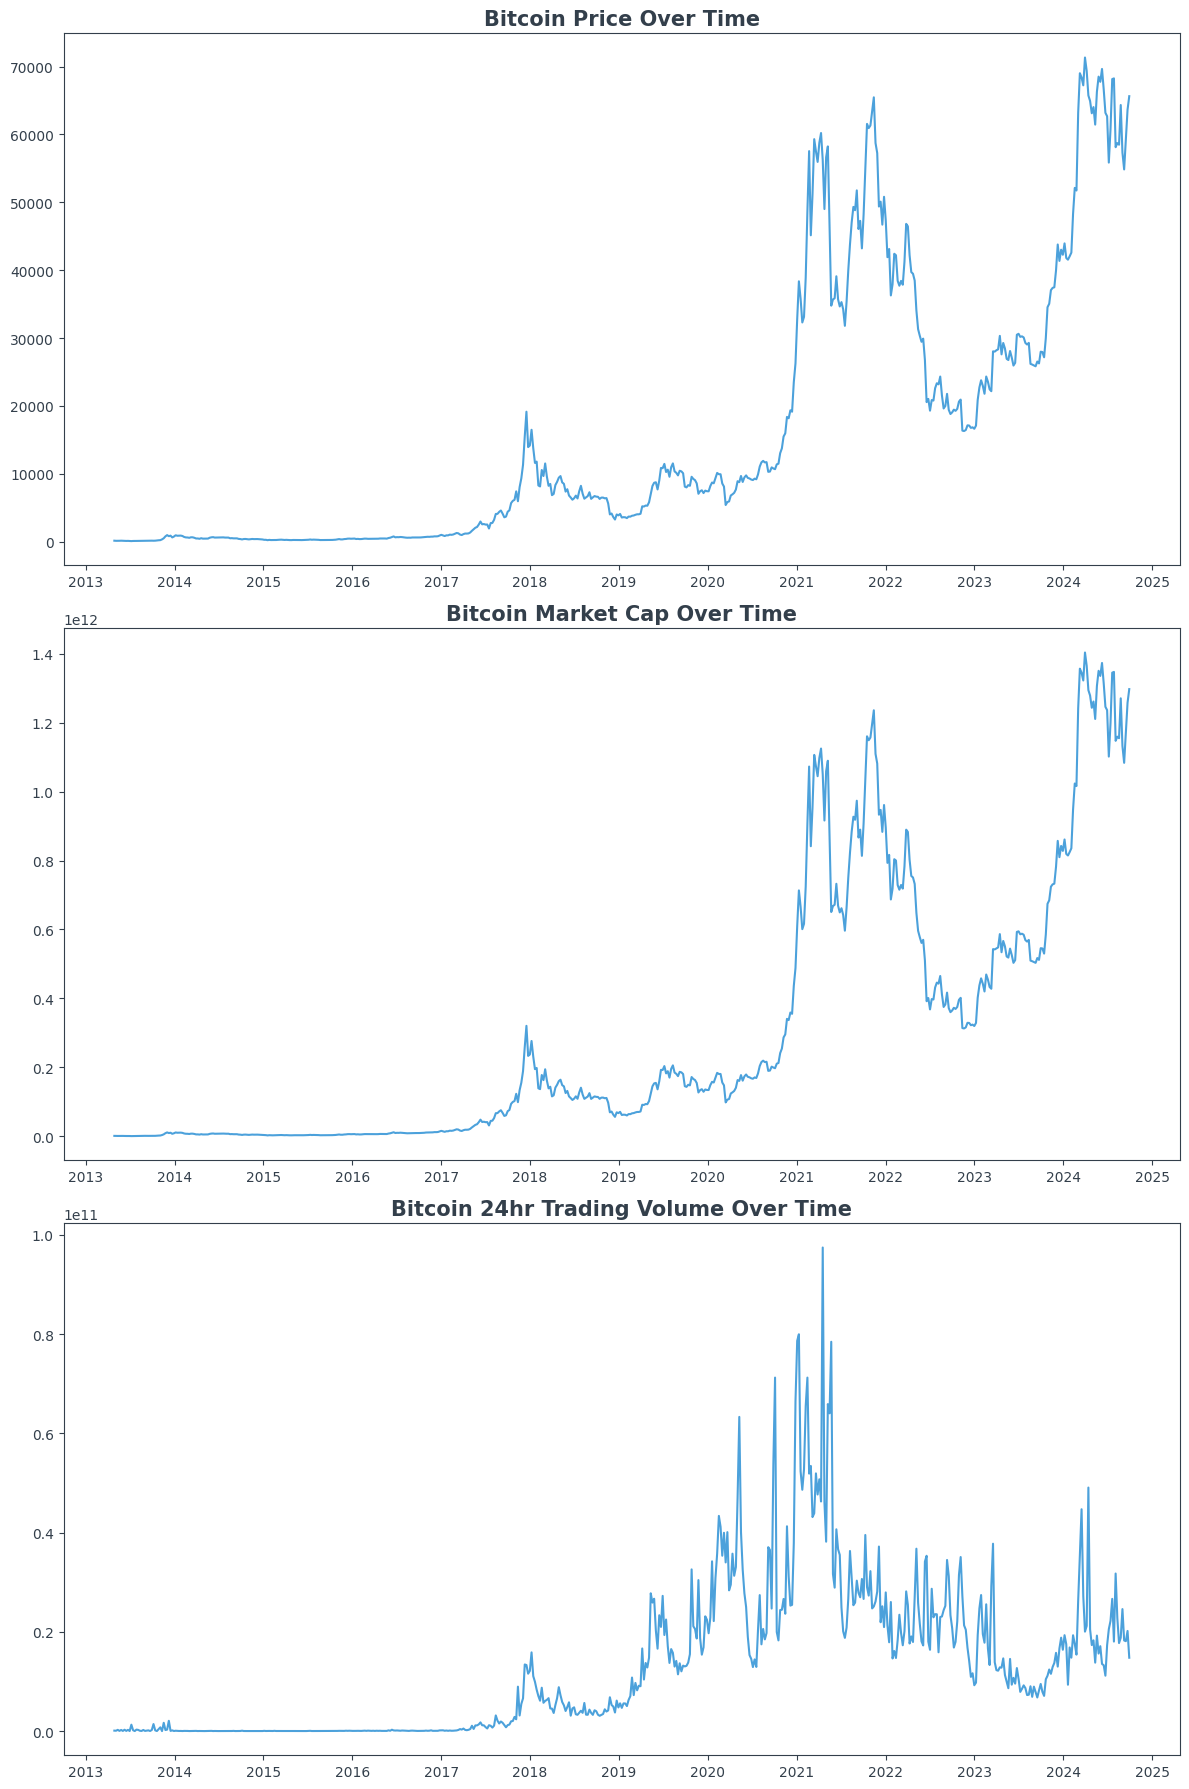

In [15]:
import matplotlib.pyplot as plt

# Convert 'Date' to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Bitcoin
btc_data = df[df['Symbol'] == 'BTC']

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

import matplotlib.dates as mdates

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 'Price' over time
axs[0].plot(btc_data['Date'], btc_data['Price'], color='#007acc', alpha=0.7)
axs[0].set_title('Bitcoin Price Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'Market Cap' over time
axs[1].plot(btc_data['Date'], btc_data['Market Cap'], color='#007acc', alpha=0.7)
axs[1].set_title('Bitcoin Market Cap Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'Volume (24hr)' over time
axs[2].plot(btc_data['Date'], btc_data['Volume (24hr)'], color='#007acc', alpha=0.7)
axs[2].set_title('Bitcoin 24hr Trading Volume Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Formatting dates
date_format = mdates.DateFormatter('%Y')
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()

# 4.2 Correlation Analysis
It is a statistical method that measures relationships between variables. By computing a correlation matrix, it identifies the strength and direction of associations between financial metrics. This analysis reveals patterns and dependencies, providing insights into the interrelationships of the variables.

In [16]:
# Compute the correlation matrix
correlation_matrix = df[['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']].corr()

# Display the correlation matrix
correlation_matrix

,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
Market Cap,1.00,0.95,-0.00,0.39,-0.04,-0.01,-0.01
Price,0.95,1.00,-0.00,0.32,-0.03,-0.00,-0.01
Circulating Supply,-0.00,-0.00,1.00,0.00,0.02,-0.00,0.01
Volume (24hr),0.39,0.32,0.00,1.00,-0.07,-0.01,-0.01
% 1h,-0.04,-0.03,0.02,-0.07,1.00,0.21,0.06
% 24h,-0.01,-0.00,-0.00,-0.01,0.21,1.00,0.10
% 7d,-0.01,-0.01,0.01,-0.01,0.06,0.10,1.00




*   'Market Cap' and 'Price' have a strong positive correlation, which suggests that cryptocurrencies with a higher market cap tend to have higher prices.

* 'Market Cap' and 'Volume (24hr)' have a moderate positive correlation, implying that cryptocurrencies with a larger market cap generally have higher trading volume.

* '% 1h', '% 24h', and '% 7d' (percentage changes in price) do not have strong correlations with the other variables, suggesting that short-term price changes may be influenced by factors not included in this dataset.



# 4.3 Trend Analysis

It involves studying of change in data over time. In this example, growth rates for 'Price' and 'Market Cap' are calculated for different cryptocurrencies. Positive values indicate growth, while negative values indicate decline. By examining these growth rates, trends can be identified, revealing which cryptocurrencies experienced significant changes in price and market capitalization over the analyzed period.

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by 'Name' and 'Date'
data_sorted = df.sort_values(by = ['Name', 'Date'])

# Calculate the Growth Rate for 'Price', 'Market Cap', 'Volume(24hr)' for each cryptocurrency
growth_rates = data_sorted.groupby('Name').apply(lambda x: ((x[['Price', 'Market Cap']].iloc[-1] - x[['Price', 'Market Cap']].iloc[0]) /  x[['Price', 'Market Cap']].iloc[0] * 100))

# Display growth rates
growth_rates

<ipython-input-17-c16cc666d552>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rates = data_sorted.groupby('Name').apply(lambda x: ((x[['Price', 'Market Cap']].iloc[-1] - x[['Price', 'Market Cap']].iloc[0]) /  x[['Price', 'Market Cap']].iloc[0] * 100))


,Price,Market Cap
Name,,
Aphroditecoin,0.00,0.00
Augur,140.77,140.80
Auroracoin,-96.54,-96.50
Avalanche,-49.74,-22.01
BNB,19.66,4.69
...,...,...
Waves,1411.48,1411.28
WorldCoin,2521.21,3774.90
XCurrency,0.00,0.00


* **Aphroditecoin, XCurrency and Yacoin**  show no significant change in 'Price' and 'Market Cap' with growth rates of 0.00
* **Augur** demonstrates notable growth with positive growth rates of 140.77% for 'Price' and 140.80% for 'Market Cap'.
* Auroracoin and Avlanche exhibits negative growth rates, indicating decline in 'Price' and 'Market Cap'.
* Other cryptocurrencies like Waves, WorldCoin, and XRP show positive growth rates, indicating significant increases in both 'Price' and 'Market Cap'.

# 4.4 Volatility Analysis
It quantifies price fluctuations in cryptocurrencies by calculating the standard deviation of their percentage price changes. It helps assess the stability and risk associated with each cryptocurrency.

In [18]:
# Calculate the percentage change of 'Price' in each row
data_sorted['Price Change'] = data_sorted.groupby('Name')['Price'].pct_change()

# Calculate the volatility as standard deviation of percentage change in 'Price' for each cryptocurrency
volatility = data_sorted.groupby('Name')['Price Change'].std()

volatility

,Price Change
Name,
Aphroditecoin,NaN
Augur,0.16
Auroracoin,0.41
Avalanche,0.17
BNB,0.08
...,...
Waves,7.30
WorldCoin,2.25
XCurrency,NaN


* Cryptocurrencies like Aphroditecoin, XCurrency, and Yacoin have NaN (Not a Number) values for volatility, indicating insufficient data or a lack of price changes to calculate volatility.

* Augur and Auroracoin exhibit relatively higher volatility scores of 0.16 and 0.41, respectively. This suggests that their prices have experienced more significant fluctuations compared to other cryptocurrencies in the dataset.

* Avalanche and BNB (Binance Coin) have lower volatility scores of 0.17 and 0.08, respectively, indicating relatively more stable price movements.

* The volatility scores of other cryptocurrencies in the dataset may vary, indicating different levels of price stability or volatility.

# 4.5 Comparative Analysis
It involves comparing key data points such as 'Price', 'Market Cap', and 'Volume (24hr)' for different cryptocurrencies. The analysis sorts the data, selects the most recent information for each cryptocurrency, and displays it for comparison. This allows for evaluating the relative performance and market activity of various cryptocurrencies.

In [19]:
# Get the most recent data for each cryptocurrency
most_recent_data = data_sorted.groupby('Name').last()

# Display the 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
comparative_data = most_recent_data[['Price', 'Market Cap', 'Volume (24hr)']]

comparative_data

,Price,Market Cap,Volume (24hr)
Name,,,
Aphroditecoin,3.85,86892531.75,45328.90
Augur,17.00,187021274.57,874532.06
Auroracoin,0.84,9051803.63,15410.31
Avalanche,54.11,20422170640.27,343450748.28
BNB,596.41,87035998377.46,1649655134.28
...,...,...,...
Waves,5.35,534606266.02,4447074.00
WorldCoin,0.52,19546847.28,123416.81
XCurrency,1.81,9965987.76,627465.00


* Aphroditecoin has a price of 3.85, a market cap of 86,892,531.75, and a trading volume of 45,328.90.

* Augur has a higher price of 17.00, a larger market cap of 187,021,274.57, and a higher trading volume of 874,532.06.

* Auroracoin has a relatively lower price of 0.84, a smaller market cap of 9,051, 803.63, and a trading volume of 15,410.31.



# 4.6 Predictive Analysis
It utilizes historical data to forecast future trends. In this example, a Long Short-Term Memory (LSTM) model is trained on Bitcoin price data. The model is used to make predictions, and the results are plotted alongside the original data. This analysis provides insights into potential future price movements, but it's important to note that predictions may not be entirely accurate due to inherent uncertainties in the market.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0550
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 16/50
15/

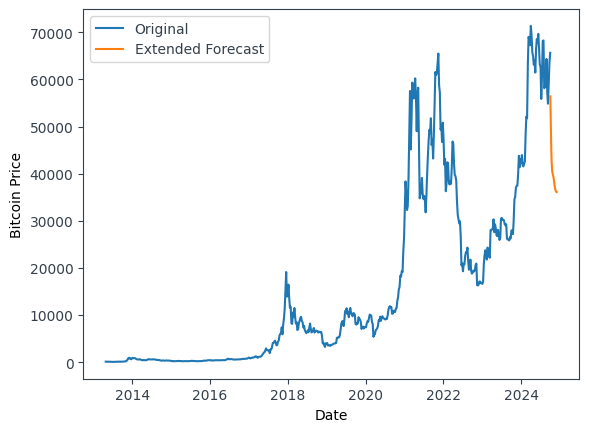

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Filter the data of Bitcoin
bitcoin_data = data_sorted[data_sorted['Name'] == 'Bitcoin']

# Extract the 'Price' column
price_data = bitcoin_data['Price'].values

# Normalize the data
scaler = MinMaxScaler()
price_data_normalized = scaler.fit_transform(price_data.reshape(-1, 1))

# Define the number of previous time steps to consider for the LSTM model
n_steps = 30

# Create input features and target variable
X = []
y = []
for i in range(n_steps, len(price_data_normalized)):
    X.append(price_data_normalized[i-n_steps:i])
    y.append(price_data_normalized[i])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
last_sequence = X_test[-1]  # Get the last sequence from the testing set
forecast = []
for _ in range(60):  # Change the range to 60 for predicting 60 days
    next_prediction = model.predict(last_sequence.reshape(1, n_steps, 1))
    forecast.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse normalize the predictions
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate the future dates for the forecast
last_date = bitcoin_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)  # Change the periods to 60

# Plot the original data and the extended forecast
plt.plot(bitcoin_data['Date'], price_data, label='Original')
plt.plot(future_dates, forecast, label='Extended Forecast')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()